In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
test_pessengerId = test_df['PassengerId']
test_pessengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# PassengerId : unique id number to each passenger
# Survived : passenger survive(1) or died(0)
# Pclass : passenger class
# Name : name of passenger
# Sex : gender of passenger
# Age : age of passenger
# SibSp : number of siblings/spouses
# Parch : number of parents/children
# Ticket : ticket number
# Fare : amount of money spent on ticket
# Cabin : cabin category
# Embarked : port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
def bar_plot(variable):
    var = train_df[variable] # get feature
    varValue = var.value_counts() # count number of categorical varibale(value / sample)

    # visualization
    plt.figure(figsize=(5,5))
    plt.bar(varValue.index, varValue, color="green", edgecolor="black", linewidth=2)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable, varValue))

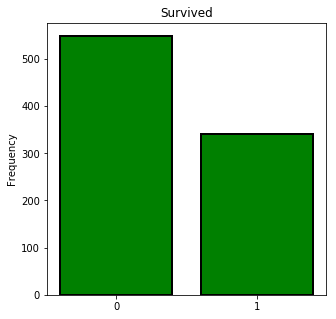

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


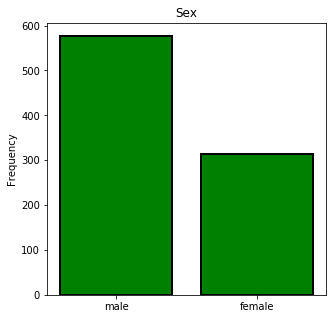

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


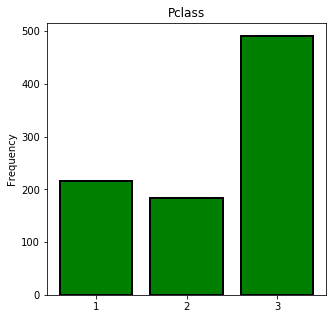

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


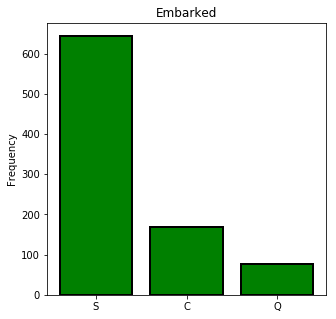

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


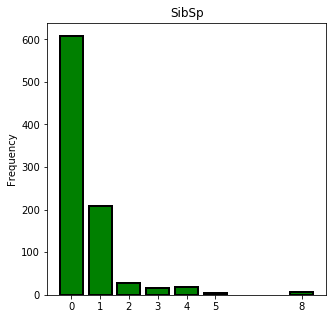

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


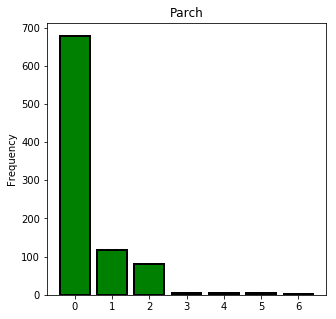

Parch: 
 0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64


In [10]:
# Categorical Variable
category1 = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]
for c in category1:
    bar_plot(c)

In [11]:
category2 = ["Cabin", "Name", "Ticket"]
for cat in category2:
    print("{} \n".format(train_df[cat].value_counts()))

B96 B98        4
G6             4
C23 C25 C27    4
F33            3
D              3
              ..
B30            1
A32            1
D21            1
B41            1
A36            1
Name: Cabin, Length: 147, dtype: int64 

Williams, Mr. Howard Hugh "Harry"                  1
Harrison, Mr. William                              1
O'Brien, Mrs. Thomas (Johanna "Hannah" Godfrey)    1
Robins, Mrs. Alexander A (Grace Charity Laury)     1
Bidois, Miss. Rosalie                              1
                                                  ..
de Messemaeker, Mrs. Guillaume Joseph (Emma)       1
Harper, Rev. John                                  1
Myhrman, Mr. Pehr Fabian Oliver Malkolm            1
Chibnall, Mrs. (Edith Martha Bowerman)             1
Elias, Mr. Dibo                                    1
Name: Name, Length: 891, dtype: int64 

1601                 7
CA. 2343             7
347082               7
CA 2144              6
347088               6
                    ..
STON/O 2. 3

In [12]:
# Numerical Variable

def plot_hist(Variable):
    plt.figure(figsize=(5, 5))
    plt.hist(train_df[Variable].dropna())
    plt.xlabel(Variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist ".format(Variable))
    plt.show()

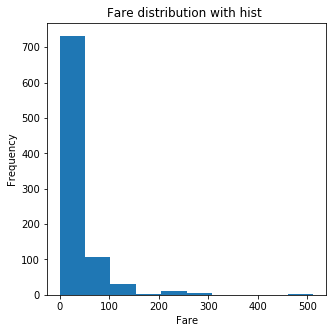

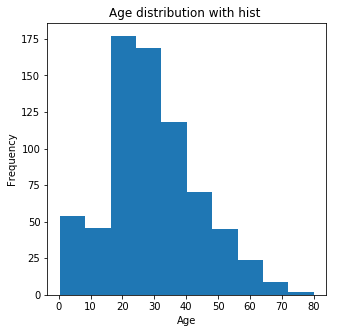

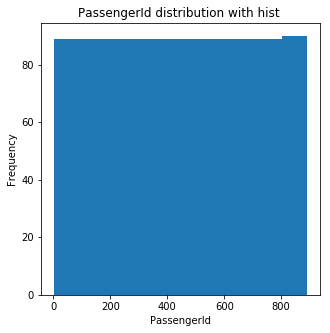

In [13]:
numericVar = ["Fare", "Age", "PassengerId"]
for n in numericVar:
    plot_hist(n)